In [16]:
import pandas as pd
import csv
import os 
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
#from pandas.tools.plotting import scatter_matrix
import urllib.request
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn import preprocessing
matplotlib.style.use('ggplot')
from sklearn.cluster import KMeans

from sklearn.preprocessing import RobustScaler, Normalizer, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.cluster import KMeans
%matplotlib inline 
import matplotlib.cm as cm

import warnings
from sklearn.metrics import silhouette_samples, silhouette_score

In [41]:
#grab the data
#Reading in feature set
file_name = os.path.join(os.getcwd(), "summary_out_Text3.csv")

df_in = pd.read_csv(file_name,skipinitialspace=True)

In [3]:
#feature selection of high dimensionality data set for unsupervised (KMeans) algo
#as described here: https://medium.com/analytics-vidhya/k-means-algorithm-in-4-parts-4-4-42bc6c781e46

In [45]:
df_in.columns

Index(['unique_award_id', 'naics_code', 'MinTxYear', 'MaxTxYear', 'NumTxYear',
       'NumTrx', 'dollars_obligated', 'level_3_cat_delivery',
       'level_3_cat_securitycompliance', 'level_3_cat_storage',
       'level_3_cat_enduser', 'level_3_cat_platform',
       'level_3_cat_application', 'level_3_cat_compute',
       'level_3_cat_itmanagement', 'level_3_cat_network',
       'level_3_cat_datacenter', 'level_2_cat_itprof', 'level_2_cat_products',
       'level_2_cat_caas', 'eighta', 'co_bus_size_sba', 'biz_rule_tiert1',
       'biz_rule_tiert2', 'biz_rule_tierbic', 'biz_rule_tier0', 'award', 'idv',
       'department_name', 'funding_agency_name', 'funding_cfo_act_agency',
       'funding_dod_or_civilian', 'vdo1_booz', 'vdo2_none', 'vdo3_dfs',
       'vdo4_saic', 'vdo5_cara', 'vdo6_ipsi', 'vdo7_attc', 'vdo8_acct',
       'vdo9_srac', 'vd10_ibm', 'vd11_other', 'va01_none', 'va02_solv',
       'va03_cara', 'va04_attc', 'va05_cell', 'va06_mcic', 'va07_dlts',
       'va08_attm', 'va09_qwe

In [73]:
#create a new dataframe with just the numeric columns

df = df_in[['naics_code', 'MinTxYear', 'MaxTxYear','NumTxYear',
       'NumTrx', 'dollars_obligated', 'level_3_cat_delivery',
       'level_3_cat_securitycompliance', 'level_3_cat_storage',
       'level_3_cat_enduser', 'level_3_cat_platform',
       'level_3_cat_application', 'level_3_cat_compute',
       'level_3_cat_itmanagement', 'level_3_cat_network',
       'level_3_cat_datacenter', 'level_2_cat_itprof', 'level_2_cat_products',
       'level_2_cat_caas', 'eighta', 'co_bus_size_sba', 'biz_rule_tiert1',
       'biz_rule_tiert2', 'biz_rule_tierbic', 'biz_rule_tier0', 
           'vdo1_booz', 'vdo2_none', 'vdo3_dfs',
       'vdo4_saic', 'vdo5_cara', 'vdo6_ipsi', 'vdo7_attc', 'vdo8_acct',
       'vdo9_srac', 'vd10_ibm', 'vd11_other', 'va01_none', 'va02_solv',
       'va03_cara', 'va04_attc', 'va05_cell', 'va06_mcic', 'va07_dlts',
       'va08_attm', 'va09_qwes', 'va10_dellm', 'va11_other','AT_A BPA CALL', 'AT_B IDC',
       'AT_B PURCHASE ORDER', 'AT_C DELIVERY ORDER',
       'AT_D DEFINITIVE CONTRACT', 'Cnr_ALLIANT', 'Cnr_CONNECTIONS', 'Cnr_EIS',
       'Cnr_MAS', 'Cnr_MILLENIAL', 'Cnr_SALESFORCE', 'Cnr_SATCOM',
       'Cnr_SCHED70', 'Cnr_STARS8A', 'Cnr_VETTECHSERV',
       'Cnr_Wireless Mobility Solutions'
           ]]

In [74]:
#8 minutes to run each one of these, let me take a sample
# check the performance here and possibly normalize
# each k takes 5 seconds on 20.8K
dfs = df.sample(frac = 0.10)

In [75]:
dfs.shape

(20771, 63)

In [77]:
scaler = RobustScaler()
df1 = scaler.fit_transform(dfs)
df1 = pd.DataFrame(df1)

kmeans_kwargs = {"init": "random","n_init": 20,"max_iter": 1000,"random_state": 1984}
cut_off=0.5
maxvars=3
kmin=5
kmax=8

#define a cols variables containing a list of all features:
cols=list(df1.columns)

# set a list and a dictionary to store the silhouette values
# for each number of clusters tested so we can choose the k value
# maximising the silhouette score, with its corresponding features
results_for_each_k=[]
vars_for_each_k={}


#three nested loops, the outer one going through the values for k, the number of clusters.
for k in range(kmin,kmax+1):
    selected_variables=[]
    
    #while loop checking that the number of retained variables is below the threshold set by maxvars
    while(len(selected_variables)<maxvars):
        print("while start ",datetime.now() )
        results=[]
        for col in cols:
            scols=[]
            scols.extend(selected_variables)
            scols.append(col) 
            kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
            kmeans.fit(df1[scols])
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                results.append(silhouette_score(df1[scols], kmeans.predict(df1[scols])))
            #print("for loop end: ", col, k, datetime.now())
            
        # identify the best variable, add it to our list and remove it 
        # from the list of variables to be tested on the next iteration
        selected_var=cols[np.argmax(results)]
        print('selected_var: ', selected_var, 'Selected Variables: ', selected_variables, datetime.now())
        #list to hold the retained features names
        selected_variables.append(selected_var)
        print(len(selected_variables))
        cols.remove(selected_var)
        print("while loop end:", len(cols), k, datetime.now())
 
    #List will hold the silhouette values for each variable
    results_for_each_k.append(max(results))
    vars_for_each_k[k]=selected_variables


best_k=np.argmax(results_for_each_k)+kmin
#you can also force a value for k
#best_k=3
selected_variables=vars_for_each_k[best_k]
kmeans = KMeans(n_clusters=best_k, **kmeans_kwargs)
kmeans.fit(df[selected_variables])
clusters=kmeans.predict(df[selected_variables])

while start  2022-06-10 11:07:11.915871


C:\Users\12024\AppData\Local\Temp\ipykernel_3540\2470635761.py:34: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(df1[scols])
C:\Users\12024\AppData\Local\Temp\ipykernel_3540\2470635761.py:34: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(df1[scols])
C:\Users\12024\AppData\Local\Temp\ipykernel_3540\2470635761.py:34: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(df1[scols])
C:\Users\12024\AppData\Local\Temp\ipykernel_3540\2470635761.py:34: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(df1[scols])
C:\Users\12024\AppData\Local\Temp\ipykernel_3540\2470635761.py:34: ConvergenceWarning: Number of distinct clusters (3) found sma

selected_var:  37 Selected Variables:  [] 2022-06-10 11:12:35.719072
1
while loop end: 62 5 2022-06-10 11:12:35.719072
while start  2022-06-10 11:12:35.719072


C:\Users\12024\AppData\Local\Temp\ipykernel_3540\2470635761.py:34: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(df1[scols])
C:\Users\12024\AppData\Local\Temp\ipykernel_3540\2470635761.py:34: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(df1[scols])
C:\Users\12024\AppData\Local\Temp\ipykernel_3540\2470635761.py:34: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(df1[scols])


selected_var:  24 Selected Variables:  [37] 2022-06-10 11:17:20.919329
2
while loop end: 61 5 2022-06-10 11:17:20.919329
while start  2022-06-10 11:17:20.920318


C:\Users\12024\AppData\Local\Temp\ipykernel_3540\2470635761.py:34: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(df1[scols])


selected_var:  51 Selected Variables:  [37, 24] 2022-06-10 11:21:59.874102
3
while loop end: 60 5 2022-06-10 11:21:59.874102
while start  2022-06-10 11:21:59.874102


C:\Users\12024\AppData\Local\Temp\ipykernel_3540\2470635761.py:34: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(df1[scols])
C:\Users\12024\AppData\Local\Temp\ipykernel_3540\2470635761.py:34: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(df1[scols])
C:\Users\12024\AppData\Local\Temp\ipykernel_3540\2470635761.py:34: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(df1[scols])


selected_var:  49 Selected Variables:  [] 2022-06-10 11:27:10.457440
1
while loop end: 59 6 2022-06-10 11:27:10.457440
while start  2022-06-10 11:27:10.457440


C:\Users\12024\AppData\Local\Temp\ipykernel_3540\2470635761.py:34: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(df1[scols])


selected_var:  56 Selected Variables:  [49] 2022-06-10 11:31:44.734608
2
while loop end: 58 6 2022-06-10 11:31:44.734608
while start  2022-06-10 11:31:44.734608
selected_var:  57 Selected Variables:  [49, 56] 2022-06-10 11:36:15.689744
3
while loop end: 57 6 2022-06-10 11:36:15.689744
while start  2022-06-10 11:36:15.689744


C:\Users\12024\AppData\Local\Temp\ipykernel_3540\2470635761.py:34: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans.fit(df1[scols])


selected_var:  45 Selected Variables:  [] 2022-06-10 11:41:10.174530
1
while loop end: 56 7 2022-06-10 11:41:10.175528
while start  2022-06-10 11:41:10.175528
selected_var:  61 Selected Variables:  [45] 2022-06-10 11:45:31.221649
2
while loop end: 55 7 2022-06-10 11:45:31.222619
while start  2022-06-10 11:45:31.222619
selected_var:  33 Selected Variables:  [45, 61] 2022-06-10 11:49:47.583263
3
while loop end: 54 7 2022-06-10 11:49:47.584261
while start  2022-06-10 11:49:47.584261


C:\Users\12024\AppData\Local\Temp\ipykernel_3540\2470635761.py:34: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(df1[scols])


selected_var:  1 Selected Variables:  [] 2022-06-10 11:54:27.400939
1
while loop end: 53 8 2022-06-10 11:54:27.400939
while start  2022-06-10 11:54:27.400939
selected_var:  5 Selected Variables:  [1] 2022-06-10 11:58:20.655722
2
while loop end: 52 8 2022-06-10 11:58:20.656687
while start  2022-06-10 11:58:20.656687
selected_var:  48 Selected Variables:  [1, 5] 2022-06-10 12:03:35.264984
3
while loop end: 51 8 2022-06-10 12:03:35.264984


KeyError: "None of [Int64Index([37, 24, 51], dtype='int64')] are in the [columns]"

In [106]:
df_plot = df.iloc[:, selected_variables]

In [94]:
df_plot

,va02_solv,biz_rule_tier0,AT_D DEFINITIVE CONTRACT
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
207709,0,0,0
207710,0,0,0
207711,0,0,0
207712,0,0,0


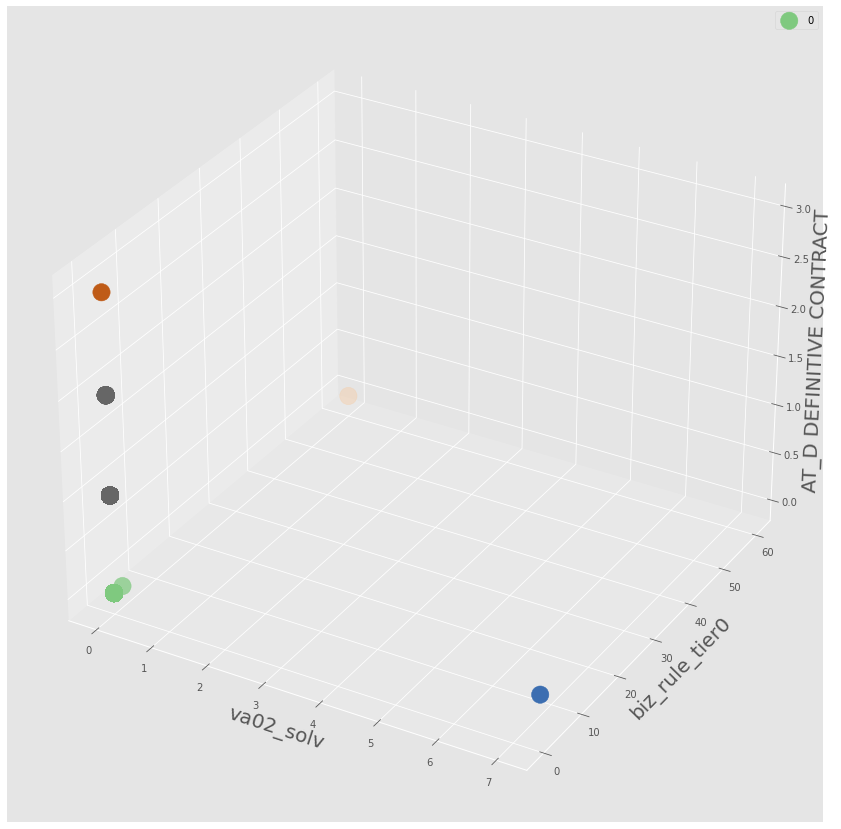

In [104]:
#Plot the best scoring features

fig = plt.figure(figsize=(15,15))
#plt.rcParams['font.size'] = 22
ax = plt.axes(projection="3d")
z_points = df_plot.iloc[:, 0].values
x_points = df_plot.iloc[:, 1].values
y_points = df_plot.iloc[:, 2].values
f1=ax.scatter3D(x_points, y_points, z_points, c=clusters,cmap='Accent',s=300);

ax.set_xlabel(df_plot.columns[selected_variables[0]],fontsize = 20)
ax.set_ylabel(df.columns[selected_variables[1]],fontsize = 20)
ax.set_zlabel(df.columns[selected_variables[2]],fontsize = 20)
ax.legend(clusters)

plt.title('KMeans For Summarized Dataset',fontsize = 24)
plt.show()